In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data_clean/olympics_results.csv')
df.tail()

,Name,Country,Time,Place,Year
1701,Jie HE,CHN,2:22:31,67,2024
1702,Tariku NOVALES,ESP,2:25:50,68,2024
1703,Dario IVANOVSKI,MKD,2:28:15,69,2024
1704,Valentin BETOUDJI,CHA,2:32:11,70,2024
1705,Ser-Od BAT-OCHIR,MGL,2:42:33,71,2024


In [4]:
df['Time'] = pd.to_timedelta(df['Time'])
df['Time'] = df['Time'].dt.total_seconds() / 3600 # Converting to hours

In [5]:
# all athletes
x = df['Year'].to_numpy().reshape(-1, 1)
y = df['Time']

# only polish athletes
df_POL = df[df['Country'] == 'POL']
xpl = df_POL['Year']
ypl = df_POL['Time']

# only kenyan & ethiopian athletes
df_KENETH = df[(df['Country'] == 'KEN') | (df['Country'] == 'ETH')]
xke = df_KENETH['Year']
yke = df_KENETH['Time']

x_reshaped = x.reshape(-1,1)
model = LinearRegression().fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

df_mean = df.groupby('Year')['Time'].mean()
df_median = df.groupby('Year')['Time'].median()

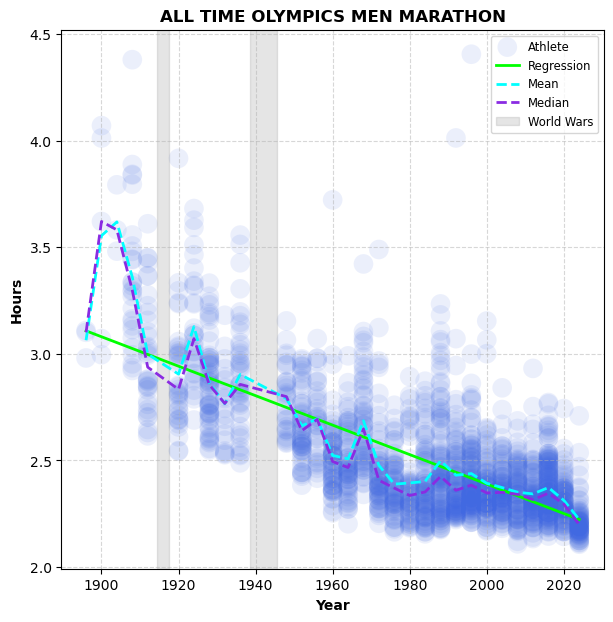

In [6]:
fig, ax = plt.subplots(figsize=(7,7)) 

def plot_base(ax):
    # ALL ATHLETES
    ax.scatter(x, y, s=200, alpha=0.1, color='royalblue', edgecolors='none', label='Athlete')
    # REGRESSION LINE
    ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
    # MEAN LINE
    ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean')
    # MEDIAN LINE
    ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median')
    # WORLD WARS GREY BARS
    ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World Wars')
    ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)
    
    ax.set_title('ALL TIME OLYMPICS MEN MARATHON', fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_yticks(np.arange(2,5,0.5))
    ax.set_xlabel('Year', fontweight='bold', fontsize=10)
    ax.set_ylabel('Hours', fontweight='bold', fontsize=10)

plot_base(ax)

ax.legend(loc='upper right', fontsize='small')
fig.savefig("charts/olympics.png", dpi=300, bbox_inches='tight')
plt.show()

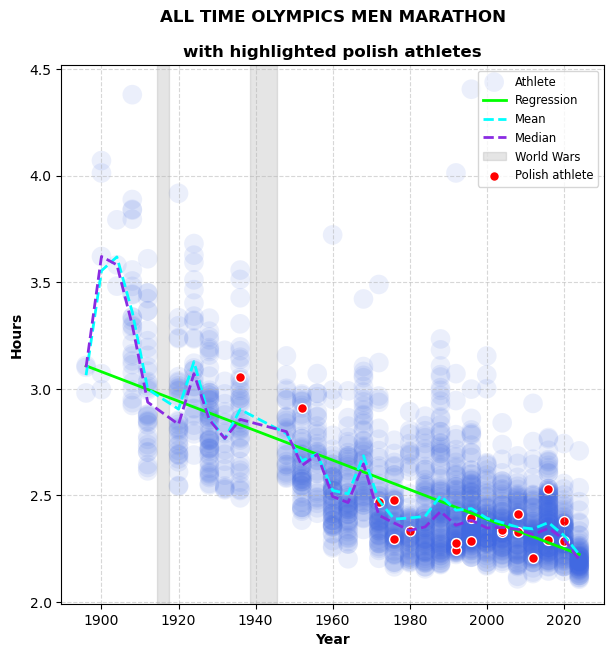

In [7]:
fig, ax1 = plt.subplots(figsize=(7,7)) 
plot_base(ax1)

# WITH POLISH ATHLETES
ax1.scatter(xpl, ypl, s=50, alpha=1, color='red', edgecolors='white', label='Polish athlete')

ax1.set_title('ALL TIME OLYMPICS MEN MARATHON\n\nwith highlighted polish athletes', fontweight='bold')
ax1.legend(loc='upper right', fontsize='small')

fig.savefig("charts/olympics_PL.png", dpi=300, bbox_inches='tight')
plt.show()

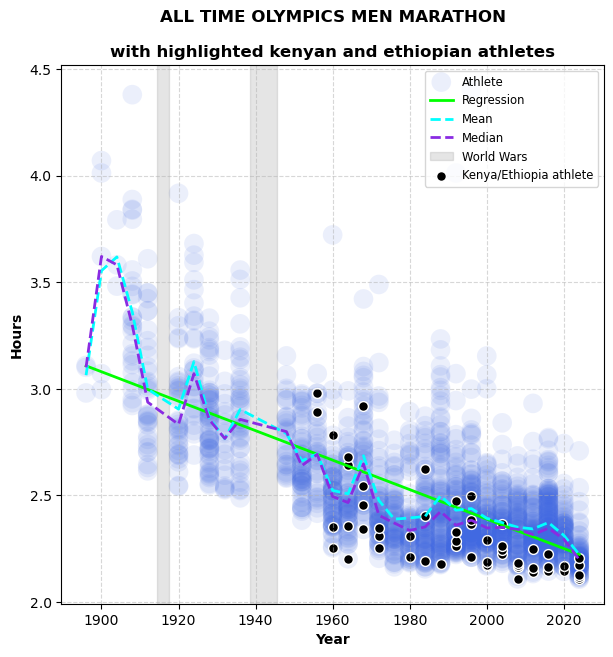

In [8]:
fig, ax2 = plt.subplots(figsize=(7,7)) 
plot_base(ax2)

# WITH KENYAN & ETHIOPIAN
ax2.scatter(xke, yke, s=50, alpha=1, color='black', edgecolors='white', label='Kenya/Ethiopia athlete')

ax2.set_title('ALL TIME OLYMPICS MEN MARATHON\n\nwith highlighted kenyan and ethiopian athletes', fontweight='bold')
ax2.legend(loc='upper right', fontsize='small')

fig.savefig("charts/olympics_KEN_ETH.png", dpi=300, bbox_inches='tight')
plt.show()